# Home Assignment No. 2: Part 2 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you may be asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

Please, write your implementation within the designated blocks:
```python
...
### BEGIN Solution

# >>> your solution here <<<

### END Solution
...
```


## Model and feature selection

Let's load the dataset for this task.

In [1]:
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
data_fs = pd.read_csv(r'data/data_fs.csv', low_memory=False)

Look at the first 10 rows of this dataset.

In [3]:
data_fs.head(10)

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
5,2011-09-06,67,46.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
6,2011-09-08,25,14.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
7,2011-09-09,44,44.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
8,2011-09-10,42,27.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0
9,2011-09-13,36,21.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,271.0,6943.0,565.0,0.45356,1240.0,269768.0,22.37,64.12,23587.0,230310.0


The dataset has many NaN's and also a lot of categorical features. So at first, you should preprocess the data. We can deal with categorical features by using one-hot encoding. To do that we can use [`pandas.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

In [4]:
# fill nan with 0
data_fs = data_fs.fillna(0)

# our goal is to predict the "price_doc" feature.
y = data_fs[["price_doc"]]
X = data_fs.drop("price_doc", axis=1)
X = X.drop("timestamp", axis=1)

# one-hot encoding
X = pd.get_dummies(X, sparse=True)

In [5]:
# Let's split our dataset into train 70 % and test 30% by using sklearn. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Look at first 10 rows what you get.
X_train.head(10)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,"child_on_acc_pre_school_3,013","child_on_acc_pre_school_7,311",modern_education_share_0,"modern_education_share_90,92","modern_education_share_93,08","modern_education_share_95,4918",old_education_build_share_0,"old_education_build_share_23,14","old_education_build_share_25,47","old_education_build_share_8,2517"
14065,46,44.0,7.0,25.0,1.0,2015.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
12978,77,48.0,17.0,17.0,4.0,2009.0,3.0,9.0,3.0,1.631523e+07,...,1,0,0,1,0,0,0,1,0,0
18695,39,18.0,7.0,17.0,1.0,0.0,1.0,9.0,0.0,5.293465e+06,...,0,0,0,0,1,0,0,0,1,0
26411,52,52.0,9.0,17.0,1.0,0.0,2.0,1.0,1.0,2.553630e+07,...,0,0,0,0,1,0,0,0,1,0
1419,30,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.641243e+06,...,0,1,1,0,0,0,1,0,0,0
29787,99,0.0,12.0,0.0,1.0,2015.0,4.0,1.0,1.0,4.441296e+06,...,0,0,0,0,0,1,0,0,0,1
18411,40,0.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,1.139168e+07,...,0,0,0,0,1,0,0,0,1,0
11541,31,17.0,1.0,9.0,2.0,1964.0,1.0,6.0,2.0,4.662813e+06,...,1,0,0,1,0,0,0,1,0,0
20741,55,0.0,6.0,0.0,1.0,0.0,2.0,12.0,1.0,6.677245e+07,...,0,0,0,0,1,0,0,0,1,0
13103,58,42.0,7.0,9.0,1.0,1974.0,3.0,6.0,2.0,4.389199e+06,...,1,0,0,1,0,0,0,1,0,0


Okay, now let's see how much data we have.

In [6]:
print("Train size =", X_train.shape)
print("Test size =", X_test.shape)

Train size = (21329, 560)
Test size = (9142, 560)


There are too many features in this dataset and not all of them are equally important for our problem. Besides, using the whole dataset as-is to train a linear model will, for sure, lead to overfitting. Instead of painful and time consuming manual selection of the most relevant data, we will use the methods of automatic feature selection.

<br>

But at first, we almost forgot to take a look at our targets. Let's plot `y_train` histogram.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026882FB7F28>]],
      dtype=object)

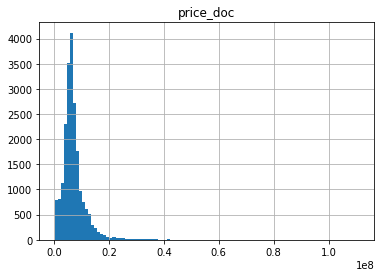

In [7]:
y_train.hist(bins=100)

There is a big variance in it and it's far from being a normal distribution. In the real-world problems it happens all the time: the data can be far from perfect. We can use some tricks to make it more like what we want.
In this particular case we can predict $\log y$ instead of $y$. This transformation is invertible, so we will be able to get our $y$ back.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002688303E438>]],
      dtype=object)

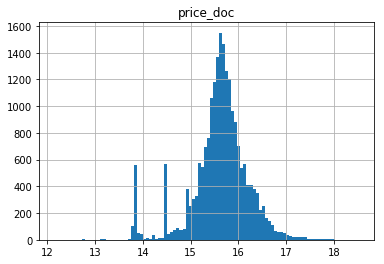

In [8]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)
y_train_log.hist(bins=100)

Now it looks more like the data we want to deal with.

The preprocessing is finally over, so now we are ready for the actual task.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>

If you have difficulties with solving the below problems take a look at seminar $7$ on feature and model selection.

<br>

### Task 1 (1 pt.): Random forest feature importances

Use random forest to find the imortance of features. Plot the histogram.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


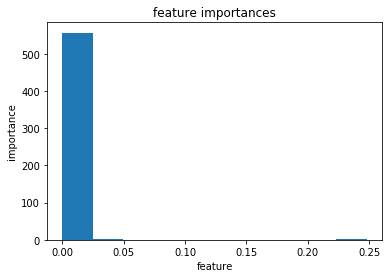

In [9]:
from sklearn.ensemble import RandomForestRegressor

### BEGIN Solution

rf = RandomForestRegressor(n_estimators=20, random_state=13)
rf.fit(X_train, y_train_log)

ft_importances = rf.feature_importances_

plt.title('feature importances')
plt.xlabel('feature')
plt.ylabel('importance')
plt.hist(ft_importances)
plt.show()

### END Solution

Print the 20 most important features and their **values**.

In [10]:
### BEGIN Solution

ft_importances_zip = zip(X_train.columns, ft_importances)
ft_importances_zip = sorted(ft_importances_zip, key=lambda x: x[1], reverse=True)
ft_important = ft_importances_zip[:20]
for ft in ft_important:
    print(ft)

### END Solution

('full_sq', 0.24798774568908785)
('cafe_count_3000', 0.02796606585169375)
('sport_count_3000', 0.026783004490406798)
('cafe_count_5000_price_2500', 0.017119770924705572)
('cafe_count_2000', 0.014072117886859484)
('micex_cbi_tr', 0.011336460951851259)
('brent', 0.008813779858000923)
('ttk_km', 0.008602691360241601)
('cafe_count_5000', 0.007970742490819565)
('metro_km_avto', 0.00756615308146016)
('exhibition_km', 0.007561007082436675)
('swim_pool_km', 0.007357614174741111)
('eurrub', 0.007272444195597369)
('kindergarten_km', 0.006939751236563449)
('floor', 0.006340188443756886)
('micex', 0.0062982151485005775)
('hospice_morgue_km', 0.006176417332380609)
('ice_rink_km', 0.006056943626300089)
('additional_education_km', 0.0060542987168004875)
('public_healthcare_km', 0.005935710193518651)


<br>

### Task 2 (1 pt.)

On these 20 features train each of the following models
* **Linear Regression**
* **Ridge regression**
* **Random forest**
* **DecisionTree**

and test its performance using the **Root Mean Squared Logarithmic Error** (RMSLE).

In [11]:
from sklearn.metrics import mean_squared_log_error

You will need to do it for the next tasks too, so we recommend you to implement
a dedicated function for comparisons, which
1. on input the function takes a training dataset `(X_train, y_train)` and a test sample `(X_test, y_test)`
2. it trains **all of the listed models** on the `(X_train, y_train)` sample
3. it computes and returns a table the RMSLE score of each fitted model on the test dataset`(X_test, y_test)`

In [12]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error

def comparator(X_train, y_train, X_test, y_test):
    """
    Parameters
    ==========
        X_train: ndarray - training inputs
        y_train: ndarray - training targets
        X_test: ndarray - test inputs
        y_test: ndarray - test targets
        
    Returns
    =======
        pd.DataFrame - table of RMSLE scores of each model on test and train datasets
    """
    methods = {
        "Linear Regression": sklearn.linear_model.LinearRegression(), 
        "Lasso": linear_model.Lasso(), 
        "Ridge": linear_model.Ridge(),
        "Dtree": sklearn.tree.DecisionTreeRegressor(),
        "RFR": sklearn.ensemble.RandomForestRegressor(n_estimators = 100)
    }

### BEGIN Solution

    error_train = []
    error_test = []
    
    for model in methods.values():
        model.fit(X_train, y_train)
        error_train.append(np.sqrt(mean_squared_log_error(y_train, model.predict(X_train))))
        error_test.append(np.sqrt(mean_squared_log_error(y_test, model.predict(X_test))))

### END Solution
    return pd.DataFrame({
        "Methods": list(methods.keys()),
        "Train loss": error_train,
        "Test loss": error_test
    })

Now apply this function

In [13]:
### BEGIN Solution

important_names = [x[0] for x in ft_important]
results = comparator(X_train[important_names].values, y_train, X_test[important_names].values, y_test)
results

### END Solution

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Methods,Train loss,Test loss
0,Linear Regression,0.547910,0.547541
1,Lasso,0.547945,0.547578
2,Ridge,0.547910,0.547541
3,Dtree,0.000558,0.654545
4,RFR,0.257523,0.471228


<br>

## Forward-backward methods

The idea is to add or remove features and look how it influences the value of the loss function or some other criteria.

Decision about adding or deleting a feature may be made based on:

- AIC
- BIC
- validation error
- Mallows $C_p$
- sklearn's `estimator.score()`

### Task 3 (2 pt.): Implement forward method with early stopping

Implement the following greedy feature selection algorithm:

```python
# Initialize with an empty list of features.
list_of_best_features = []

while round < n_rounds:
    round = round + 1
    
    if no_more_features:
        # end loop

    # Iterate over currently *unsued* features and use $k$-fold 
    # . `cross_val_score` to measure model "quality".
    compute_quality_with_each_new_unused_feature(...)

    # **Add** the feature that gives the highest "quality" of the model.
    pick_and_add_the_best_feature(...)

    if model_quality_has_increased_since_last_round:
        round = 0

return list_of_best_features
```

### **<span style="color:red">ATTN</span>**
Use $k=3$ for the $k$-fold cv, because higher values could take a **lo-o-o-o-o-o-o-o-ong** time.

Please bear in mind that **the lower** RMSLE (`mean_squared_log_error`) is, **the higher the model "quality" is**.

Please look up `cross_val_score(...)` peculiarities in [scikit's manual](https://scikit-learn.org/stable/documentation.html).

In the cell below implement a function that would iterate over a list of features and use $k$-fold `cross_val_score` to measure model "quality".

In [14]:
from sklearn.metrics import make_scorer

def selection_step(model, X, y, used_features=(), cv=3):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        used_features: - list of features
        cv: int - number of folds

    Returns
    =======
        scores - dictionary of scores
    """
    
    scores = {}
    
    ### BEGIN Solution
    
    for ft in set(X.columns) - set(used_features):
        ft_score = cross_val_score(
            model,
            X[used_features + [ft]],
            y,
            scoring=make_scorer(lambda y, y_pred: np.sqrt(mean_squared_log_error(y, y_pred))),
            cv=cv
        ).mean()
        scores[ft] = ft_score
    
    ### END Solution

    return scores

In [15]:
def forward_steps(X, y, n_rounds, method):
    """
    Parameters
    ==========
        X: ndarray - training inputs
        y: ndarray - training targets
        n_rounds: int - early stop when score doesn't increase n_rounds
        method: sklearn model

    Returns
    =======
        feat_best_list - list of features
    """
    
    feat_best_list = []

    ### BEGIN Solution
    
    best_score = 1e6
    round = 0
    
    while round < n_rounds:
        
        round += 1
        if len(set(X.columns) - set(feat_best_list)) == 0:
            break
        
        scores = selection_step(method, X, y, used_features=feat_best_list)
        best_feature = min(scores, key=scores.get)
        feat_best_list.append(best_feature)
        
        if min(scores.values()) < best_score:
            round = 0
            best_score = min(scores.values())
    
    ### END Solution
    
    return feat_best_list


Use the function implemented above and use DecisionTreeRegressor to get the best features according to this algorithm and print them.

In [16]:
%%time
### BEGIN Solution
dt = sklearn.tree.DecisionTreeRegressor()

dt_feat_best = forward_steps(X_train, y_train, n_rounds=5, method=dt)
print(dt_feat_best)
### END Solution

['full_sq', 'ecology_no data', 'sub_area_Nekrasovka', 'sub_area_Poselenie Vnukovskoe', 'sub_area_Zapadnoe Degunino', 'sub_area_Poselenie Novofedorovskoe', 'sub_area_Krylatskoe', 'sub_area_Poselenie Filimonkovskoe', 'mosque_count_3000', 'cafe_count_500_price_high', 'sub_area_Severnoe Butovo', 'sub_area_Strogino', 'sub_area_Poselenie Krasnopahorskoe', 'sub_area_Nagatinskij Zaton', 'sub_area_Poselenie Shherbinka', 'sub_area_Nizhegorodskoe', 'sub_area_Poselenie Rogovskoe', 'sub_area_Pokrovskoe Streshnevo', 'sub_area_Danilovskoe', 'sub_area_Begovoe', 'sub_area_Ostankinskoe', 'sub_area_Troickij okrug', 'sub_area_Basmannoe', 'sub_area_Poselenie Moskovskij', 'sub_area_Poselenie Shhapovskoe', "sub_area_Zamoskvorech'e", 'sub_area_Rostokino', 'sub_area_Poselenie Klenovskoe', 'sub_area_Meshhanskoe', 'sub_area_Poselenie Mihajlovo-Jarcevskoe', 'sub_area_Poselenie Desjonovskoe', 'sub_area_Poselenie Voronovskoe', 'sub_area_Molzhaninovskoe', 'sub_area_Babushkinskoe', 'sub_area_Metrogorodok', 'sub_area_

Use Linear Regression, Ridge regression, Random forest and DecisionTree to get the RMSLE score using these features. Remember the function you wrote earlier.

In [17]:
### BEGIN Solution

results = comparator(X_train[dt_feat_best].values, y_train, X_test[dt_feat_best].values, y_test)
results

### END Solution

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


,Methods,Train loss,Test loss
0,Linear Regression,0.559675,0.558623
1,Lasso,0.559675,0.558624
2,Ridge,0.559712,0.558729
3,Dtree,0.469496,0.509057
4,RFR,0.473297,0.498536


<br>

## Boosting: gradient boosting, adaboost


### Practical Boosting

In this task you are asked to implement a boosting algorithm, and compare speed of
different popular boosting libraries.

### Task 4 (2 pt.): Boosting Classification on a toy dataset

Let's generate a toy dataset for classification.

In [24]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=300, shuffle=True, noise=0.05, random_state=1011)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1011)

Your task is:
1. Implement gradient boosting algorithms with **logistic loss**
and labels $y\in \{-1, +1\}$;
2. **Plot the decision boundary** on a $2$-d grid; 
3. Estimate the accuracy **score** on the test dataset, as well
as other classification metrics, that you can think of;
    
For basic implementation please refer to seminars $8-9$.

,Metric,Score
0,Accuracy,0.967
1,F1,0.966
2,Hamming,0.033
3,Jaccard,0.967
4,Logloss,1.151
5,Matthews,0.933
6,Precision,0.966
7,Recall,0.966
8,Zero-one,0.033


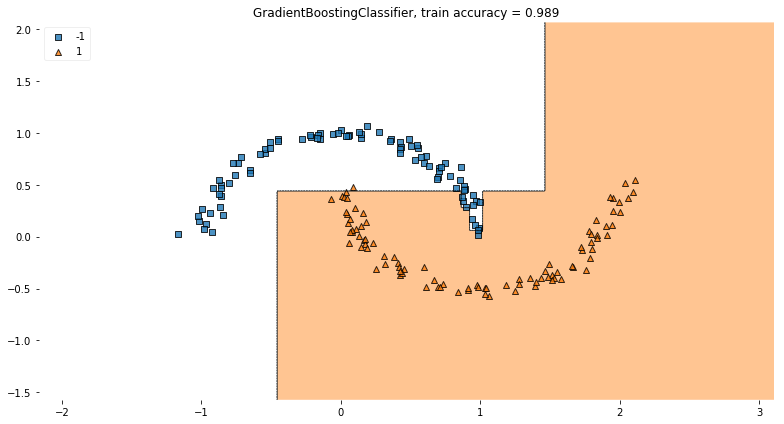

In [33]:
### BEGIN Solution

from mlxtend.plotting import plot_decision_regions
from scipy.optimize import minimize
from sklearn.tree import DecisionTreeRegressor

class GradientBoosting:
    def __init__(self, n_estimators=30, max_depth=3, random_state=13):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        
        self.models = []
        self.steps = []
        
    def fit(self, X, y):
        y_pred = np.ones_like(y, dtype='float64')
        for _ in range(self.n_estimators):
            res = y / (1 + np.exp(y * y_pred))
            dt = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            dt.fit(X, res)
            self.models.append(dt)
            opt_step = minimize(lambda step: sklearn.metrics.log_loss(y, y_pred + step * dt.predict(X)), 1.0).x[0]
            self.steps.append(opt_step)
            y_pred += opt_step * dt.predict(X)
        return self
    
    def predict(self, X):
        y_pred = np.ones(len(X), dtype='float64')
        for i in range(self.n_estimators):
            y_pred += self.steps[i] * self.models[i].predict(X)
        return np.sign(y_pred)

# to make classes -1/1 instead of 0/1
y_train_new = 2 * y_train - 1
y_test_new = 2 * y_test - 1

gb = GradientBoosting()
gb.fit(X_train, y_train_new)

plt.figure(figsize=(11, 6))
plot_decision_regions(X=X_train, y=y_train_new, clf=gb, legend=2)
plt.title('GradientBoostingClassifier, train accuracy = {:0.3f}'.format(sklearn.metrics.accuracy_score(y_train_new, gb.predict(X_train))))
plt.tight_layout()

metrics = [
    sklearn.metrics.accuracy_score,
    sklearn.metrics.f1_score,
    sklearn.metrics.hamming_loss,
    sklearn.metrics.jaccard_similarity_score,
    sklearn.metrics.log_loss,
    sklearn.metrics.matthews_corrcoef,
    sklearn.metrics.precision_score,
    sklearn.metrics.recall_score,
    sklearn.metrics.zero_one_loss
]
labels = [
    'Accuracy',
    'F1',
    'Hamming',
    'Jaccard',
    'Logloss',
    'Matthews',
    'Precision',
    'Recall',
    'Zero-one'
]
scores = []
for m in metrics:
    scores.append(m(y_test_new, gb.predict(X_test)).round(3))

pd.DataFrame(data=np.array([labels, scores]).T, columns=['Metric', 'Score'])

### END Solution

<br/> <!--Intentionally left blank-->

### Task 5 (1 pt.): Measuring the Speed and Performance

Please make sure to install the following powerful packages for boosting:
* [xgboost](https://anaconda.org/conda-forge/xgboost)
* [lightgbm](https://anaconda.org/conda-forge/lightgbm)
* [catboost](https://tech.yandex.com/catboost/doc/dg/concepts/python-installation-docpage/)

In this task you are asked to compare the **training time** of the **GBDT**, the
Gradient Boosted Decision Trees, as implemeted by different popular ML libraries.
The dataset you shall use is the [UCI Breast Cancer dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).
You should study the parameters of each library and establish the **correspondence**
between them.

The plan is as follows:
1. Take the **default** parameter settings, measure the training time, and plot
the ROC curves;
2. Use grid search with the $3$-fold cross valiadation to choose the best model.
Then measure the training time as a function of (separately) **tree depth** and **the
number of estimators in the ensemble**, finally **plot the ROC** curves of the best
models.

You need to make sure that you are comparing **comparable** classifiers, i.e. with
**the same tree and ensemble hyperparameters**.

<span style="color:green">**NOTE**</span> You need figure out how to make parameter settings
compatible. One possible way to understand the correspondence is to study the docs. You may
choose the default parameters from any library.

Please plot **three** ROC curves, one per library, on the same **one plot**
with a *comprehensible [legend](https://matplotlib.org/users/legend_guide.html)*.

A useful command for timing is IPython's [**timeit** cell magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit). 

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

XGBoost train time: 0.0490
LGBM train time: 0.0760
CatBoost train time: 1.8167


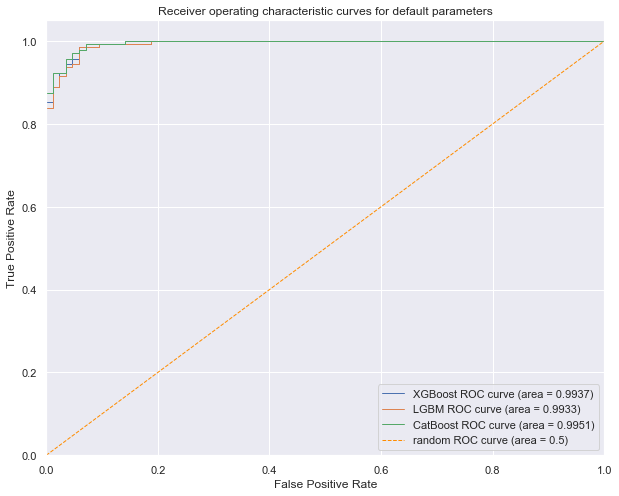

In [39]:
### BEGIN Solution
import time
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import seaborn as sns
sns.set()

# https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python
def generate_metrics(prediction):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(2):
        fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(y_test, prediction[:, i])
        roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
    return fpr, tpr, roc_auc

clfs = [
    XGBClassifier(seed=13),
    LGBMClassifier(num_leaves=None, max_depth=3, min_child_weight=1, min_child_samples=1, reg_lambda=1, random_state=13),
    CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, l2_leaf_reg=1, verbose=0, random_state=13)
]
labels = ['XGBoost', 'LGBM', 'CatBoost']

plt.figure(figsize=(10, 8))
for i in range(3):
    start_time = time.time()
    clf = clfs[i]
    clf.fit(X_train, y_train)
    print(labels[i] + ' train time: {0:.4f}'.format(time.time() - start_time))
    clf_pred = clf.predict_proba(X_test)
    clf_fpr, clf_tpr, clf_roc_auc = generate_metrics(clf_pred)
    plt.plot(clf_fpr[1], clf_tpr[1], lw=1, label=labels[i] + ' ROC curve (area = %0.4f)' % clf_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--', label='random ROC curve (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves for default parameters')
plt.legend(loc='best')
plt.show()
    
### END Solution

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:    9.4s finished


XGBoost CV time: 9.5420 seconds
Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    7.3s finished


LGBM CV time: 7.4170 seconds
Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  8.5min finished


CatBoost CV time: 516.1920 seconds


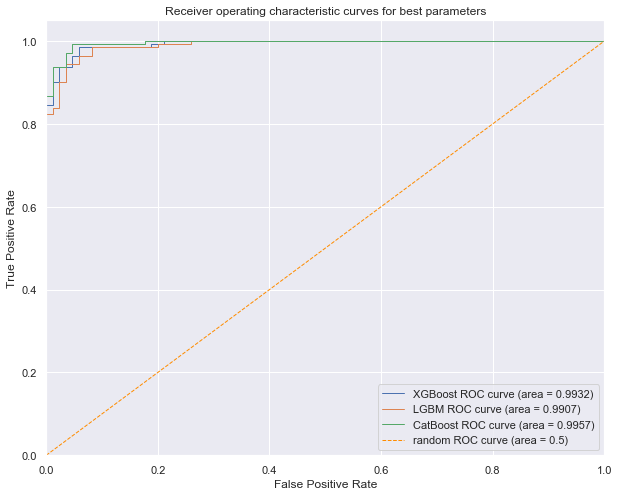

In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'max_depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'reg_lambda': [0.1, 0.5, 1.0],
    },
    {
        'max_depth': [3, 4],
        'learning_rate': [0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'reg_lambda': [0.1, 0.5, 1.0],
    },
    {
        'depth': [3, 4, 5],
        'learning_rate': [0.05, 0.1],
        'iterations': [100, 200, 300],
        'l2_leaf_reg': [0.1, 0.5, 1.0],
    }
]

plt.figure(figsize=(10, 8))
for i in range(3):
    start_time = time.time()
    grid_clf = GridSearchCV(clfs[i], param_grid[i], scoring='roc_auc', cv=3, verbose=1)
    grid_clf.fit(X_train, y_train)
    clf_best = grid_clf.best_estimator_
    print(labels[i] + ' CV time: {0:.4f} seconds'.format(time.time() - start_time))
    clf_pred = clf_best.predict_proba(X_test)
    clf_fpr, clf_tpr, clf_roc_auc = generate_metrics(clf_pred)
    plt.plot(clf_fpr[1], clf_tpr[1], lw=1, label=labels[i] + ' ROC curve (area = %0.4f)' % clf_roc_auc[1])
plt.plot([0, 1], [0, 1], lw=1, color='darkorange', linestyle='--', label='random ROC curve (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curves for best parameters')
plt.legend(loc='best')
plt.show()

depth 3 finished, total time passed: 1.5881 seconds
depth 4 finished, total time passed: 3.6292 seconds
depth 5 finished, total time passed: 6.1874 seconds
depth 6 finished, total time passed: 9.6504 seconds
depth 7 finished, total time passed: 16.2323 seconds
depth 8 finished, total time passed: 27.7997 seconds
depth 9 finished, total time passed: 49.8772 seconds
depth 10 finished, total time passed: 91.1824 seconds


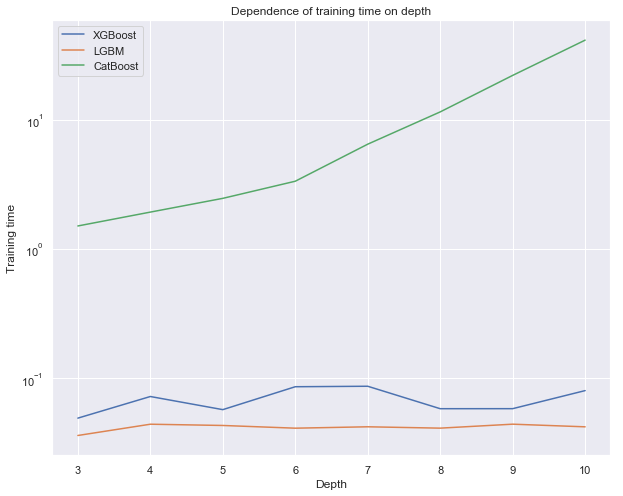

In [55]:
xgb_time = []
lgbm_time = []
cb_time = []

total_start_time = time.time()
for d in range(3, 11):
    start_time = time.time()
    xgb = XGBClassifier(max_depth=d, seed=13)
    xgb.fit(X_train, y_train)
    xgb_time.append(time.time() - start_time)

    start_time = time.time()
    lgbm = LGBMClassifier(num_leaves=None, max_depth=d, min_child_weight=1, min_child_samples=1, reg_lambda=1, random_state=13)
    lgbm.fit(X_train, y_train)
    lgbm_time.append(time.time() - start_time)
    
    start_time = time.time()
    cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=d, l2_leaf_reg=1, verbose=0, random_state=13)
    cb.fit(X_train, y_train)
    cb_time.append(time.time() - start_time)
    
    print('depth', d, 'finished, total time passed: {0:.4f} seconds'.format(time.time() - total_start_time))

plt.figure(figsize=(10, 8))
plt.semilogy(range(3, 11), xgb_time, label='XGBoost')
plt.semilogy(range(3, 11), lgbm_time, label='LGBM')
plt.semilogy(range(3, 11), cb_time, label='CatBoost')
plt.xlabel('Depth')
plt.ylabel('Training time')
plt.title('Dependence of training time on depth')
plt.legend(loc='best')
plt.show()

n_estimators 50 finished, total time passed: 1.3053 seconds
n_estimators 100 finished, total time passed: 2.9681 seconds
n_estimators 150 finished, total time passed: 5.1515 seconds
n_estimators 200 finished, total time passed: 7.8183 seconds
n_estimators 250 finished, total time passed: 11.1461 seconds
n_estimators 300 finished, total time passed: 15.0197 seconds
n_estimators 350 finished, total time passed: 19.6412 seconds
n_estimators 400 finished, total time passed: 24.7127 seconds
n_estimators 450 finished, total time passed: 30.3668 seconds
n_estimators 500 finished, total time passed: 36.6257 seconds
n_estimators 550 finished, total time passed: 43.4673 seconds
n_estimators 600 finished, total time passed: 51.1020 seconds
n_estimators 650 finished, total time passed: 59.3692 seconds
n_estimators 700 finished, total time passed: 68.3386 seconds
n_estimators 750 finished, total time passed: 78.0577 seconds
n_estimators 800 finished, total time passed: 88.2237 seconds
n_estimators 

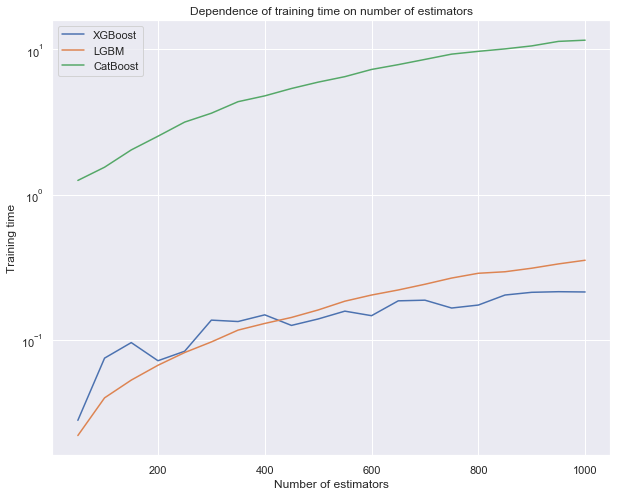

In [67]:
xgb_time = []
lgbm_time = []
cb_time = []

n_estimators_array = np.linspace(50, 1000, 20).astype(int)

total_start_time = time.time()

for n in n_estimators_array:
    start_time = time.time()
    xgb = XGBClassifier(n_estimators=n, seed=13)
    xgb.fit(X_train, y_train)
    xgb_time.append(time.time() - start_time)

    start_time = time.time()
    lgbm = LGBMClassifier(n_estimators=n, num_leaves=None, max_depth=3, min_child_weight=1, min_child_samples=1, reg_lambda=1, random_state=13)
    lgbm.fit(X_train, y_train)
    lgbm_time.append(time.time() - start_time)
    
    start_time = time.time()
    cb = CatBoostClassifier(iterations=n, learning_rate=0.1, depth=3, l2_leaf_reg=1, verbose=0, random_state=13)
    cb.fit(X_train, y_train)
    cb_time.append(time.time() - start_time)
    
    print('n_estimators', n, 'finished, total time passed: {0:.4f} seconds'.format(time.time() - total_start_time))

plt.figure(figsize=(10, 8))
plt.semilogy(n_estimators_array, xgb_time, label='XGBoost')
plt.semilogy(n_estimators_array, lgbm_time, label='LGBM')
plt.semilogy(n_estimators_array, cb_time, label='CatBoost')
plt.xlabel('Number of estimators')
plt.ylabel('Training time')
plt.title('Dependence of training time on number of estimators')
plt.legend(loc='best')
plt.show()

## NNs

### Task 6 (1 pt.): Activation functions
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch realizations and their derivatives using autograd functionality:
* ReLU, ELU ($\alpha = 1$), Softplus ($\beta = 1$);
* Sign, Sigmoid, Softsign, Tanh.

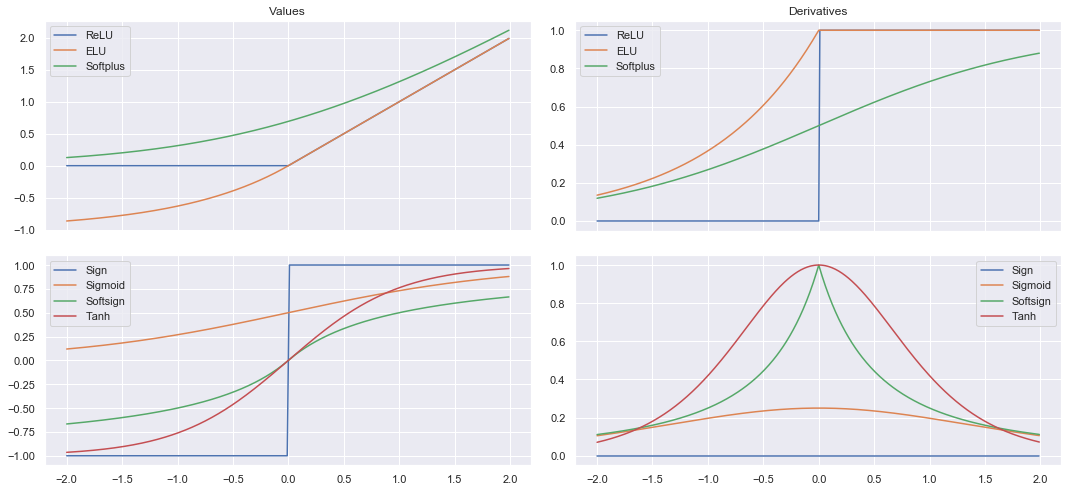

In [68]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch


x = torch.arange(-2, 2, .01, requires_grad=True)
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(15, 7))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution
        axes[i, 0].plot(x.detach().numpy(), activation(x).detach().numpy(), label=function_name)
        x.grad.zero_()
        activation(x).sum().backward()
        axes[i, 1].plot(x.detach().numpy(), x.grad.detach().numpy(), label=function_name)
        ### END Solution

    axes[i, 0].legend()
    axes[i, 1].legend()

plt.tight_layout()
plt.show()

Answer the following questions. Which of these functions may be, and which -- definitely are a poor choise as an activation function in a neural network? Why?

As we can see, sign function may be a poor choice as an activation function in a neural network because its derivative is zero everywhere (and in zero it is not differentiable) and hence it is impossible to optimize it with various optimizers. However, it may work well in some easy cases such as single-layer network and linearly separable data. On the other hand, all other functions have non-zero derivatives and differentiable everywhere except ReLU, but it is known that it is a good choice (e.g., it may add sparsity to the model).

### Task 7 (3 pt.): Backpropagation
At the seminar 10 on neural networks, we built an MLP with one hidden layer using our numpy implementations of linear layer and logistic and softmax activation functions. Your task is to
1. implement backpropagation for these modules,
2. train our numpy realization of MLP to classify the toy MNIST from `sklearn.datasets`.

In [69]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Prepare the dataset.

In [70]:
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]

input_size = 8*8
classes_n = 10

Implement the MLP with backprop.

In [90]:
class Linear:
    def __init__(self, input_size, output_size):
        self.thetas = np.random.randn(input_size, output_size)
        self.thetas_grads = np.empty(self.thetas.shape)
        self.bias = np.random.randn(output_size)
        self.bias_grads = np.empty(self.bias.shape)


    def forward(self, x): 
        output = np.matmul(x, self.thetas) + self.bias
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        input_grad = output_grad.dot(self.thetas.T)
        self.thetas_grads = np.outer(x, output_grad)
        self.bias_grads = np.sum(output_grad, axis=0)
        ### END Solution
        return input_grad

class LogisticActivation:
    def forward(self, x):
        output = 1/(1 + np.exp(-x))
        return output


    def backward(self, x, output_grad):
        ### BEGIN Solution
        y = self.forward(x)
        input_grad = output_grad * y * (1 - y)
        ### END Solution
        return input_grad
    

class SoftMaxActivation:
    def forward(self, x):
        output = np.exp(x) / np.exp(x).sum(axis=-1, keepdims=True)
        return output
    

    def backward(self, x, output_grad):
        ### BEGIN Solution
        y = self.forward(x)
        input_grad = output_grad.dot(-np.outer(y, y) + np.diag(y ** 2))
        ### END Solution
        return input_grad
    

class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
    
    def forward(self, x):
        return self.linear2.forward(self.activation1.forward(self.linear1.forward(x)))


    def backward(self, x, output_grad):
        ### BEGIN Solution
        x1 = self.linear1.forward(x)
        x2 = self.activation1.forward(x1)
        return self.linear1.backward(x, self.activation1.backward(x1, self.linear2.backward(x2, output_grad)))
        ### END Solution

In [91]:
### BEGIN Solution
def cross_entropy_loss(target, prediction):
    return -np.log(SoftMaxActivation().forward(prediction)[target])

def cross_entropy_grad(target, prediction):
    grad = SoftMaxActivation().forward(prediction).copy()
    grad[target] -= 1
    return grad
### END Solution

Starting epoch 0
Starting epoch 10
Starting epoch 20
Starting epoch 30
Starting epoch 40
Starting epoch 50
Starting epoch 60
Starting epoch 70
Starting epoch 80
Starting epoch 90
Starting epoch 100
Starting epoch 110
Starting epoch 120
Starting epoch 130
Starting epoch 140
Starting epoch 150
Starting epoch 160
Starting epoch 170
Starting epoch 180
Starting epoch 190


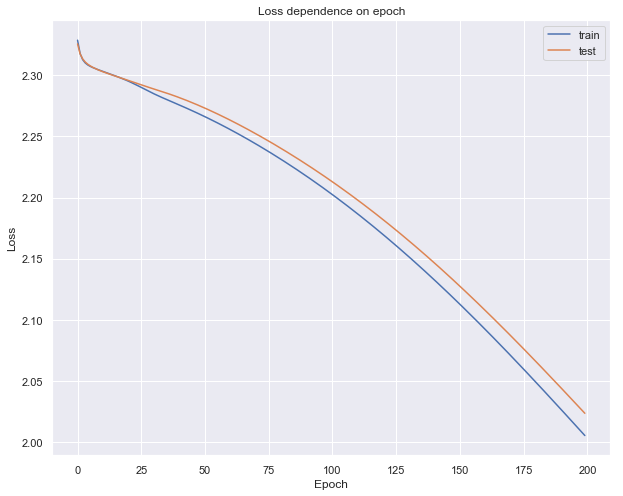

In [97]:
np.random.seed(0)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 200
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-3

for epoch in range(epochs_n):
    if epoch % 10 == 0:
        print('Starting epoch {}'.format(epoch))
    for sample_i in range(train_size):
        x = x_train[sample_i]
        target = y_train[sample_i]

        ### BEGIN Solution
        
        # ... zero the gradients
        mlp.linear1.thetas_grads *= 0
        mlp.linear1.bias_grads *= 0
        mlp.linear2.thetas_grads *= 0
        mlp.linear2.bias_grads *= 0
        
        prediction = SoftMaxActivation().forward(mlp.forward(x))
        loss = cross_entropy_loss(target, prediction)
        learning_curve[epoch] += loss
        output_grad = cross_entropy_grad(target, prediction)
        mlp.backward(x, output_grad)
        
        mlp.linear1.thetas -= learning_rate * mlp.linear1.thetas_grads
        mlp.linear1.bias -= learning_rate * mlp.linear1.bias_grads
        mlp.linear2.thetas -= learning_rate * mlp.linear2.thetas_grads
        mlp.linear2.bias -= learning_rate * mlp.linear2.bias_grads
        
    test_size = x_test.shape[0]
    
    for sample_i in range(test_size):
        x = x_test[sample_i]
        target = y_test[sample_i]
        prediction = SoftMaxActivation().forward(mlp.forward(x))
        loss = cross_entropy_loss(target, prediction)
        test_curve[epoch] += loss
    
    learning_curve[epoch] /= train_size
    test_curve[epoch] /= test_size
    ### END Solution


plt.figure(figsize=(10, 8))
plt.title('Loss dependence on epoch')
plt.plot(learning_curve, label='train')
plt.plot(test_curve, label='test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [98]:
predictions = np.argmax(mlp.forward(digits), axis=1)
print('Accuracy:', (targets == predictions).mean())
pd.DataFrame(confusion_matrix(targets, predictions))

Accuracy: 0.7790762381747357


,0,1,2,3,4,5,6,7,8,9
0,175,0,0,0,3,0,0,0,0,0
1,0,160,0,3,9,0,0,0,0,10
2,0,13,155,5,0,0,0,0,0,4
3,3,2,0,163,0,3,0,3,0,9
4,0,1,2,0,177,0,0,1,0,0
5,0,0,4,3,7,148,0,0,0,20
6,2,3,0,0,52,0,124,0,0,0
7,0,5,1,3,9,3,0,158,0,0
8,2,113,7,32,5,5,0,6,0,4
9,6,5,2,16,7,2,0,2,0,140


### Task 8 (3 pt.): Modelling real-life DL
In this task you will train your own CNN for dogs vs cats classification task. The goal of this task is not to get the highest accuracy possible (try getting the highest accuracy possible though) but to model the real-life process of training a deep neural network.

<h3><center><span style="color:red;">**IMPORTANT NOTICE**</span></center></h3>
Training neural networks is a time consuming task and it can take days or even weeks. Try not to leave this task to the last day. It is not necessary for you to use GPU for this task, but using it may drastically reduce the time required for you to complete this task.

There is a good amount of datasets in [torchvision](https://pytorch.org/docs/stable/torchvision/datasets.html), but in practice, chances are that you wouldn't find the dataset for your particular problem, so you should be capable of writing `DataLoader` for your own dataset.

In [1]:
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import PIL.Image as Image
from torch import nn
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torchvision import transforms, utils

Make sure you are using the right device.

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


First take a look at the data.

In [3]:
dt = pd.read_csv(r'data/cats_dogs/train.csv')
dt.head()

,path,y
0,cats_dogs/train/dogs/dog.342.jpg,1
1,cats_dogs/train/cats/cat.661.jpg,0
2,cats_dogs/train/cats/cat.516.jpg,0
3,cats_dogs/train/dogs/dog.938.jpg,1
4,cats_dogs/train/cats/cat.224.jpg,0


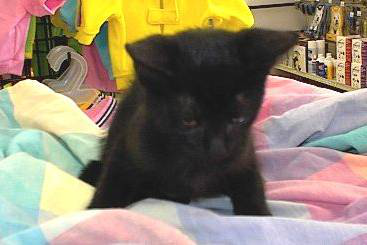

In [4]:
Image.open('data/' + dt['path'].iloc[1])

Implement your [`Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset) class.

In [5]:
class CustomDataset(Dataset):
    """ Some documantation"""

    def __init__(self,csv_file, root_dir, transform=None):
        """
        Args:
        """
        ### BEGIN Solution
        self.dt = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        ### END Solution
    

    def __getitem__(self, idx):
        ### BEGIN Solution
        img = Image.open(self.root_dir + self.dt['path'].iloc[idx])
        if self.transform:
            img = self.transform(img)
        else:
            img = torch.tensor(np.array(img))
        y = self.dt['y'].iloc[idx]
        return img, torch.tensor(y)
        ### END Solution
    
    
    def __len__(self):
        ### BEGIN Solution
        return len(self.dt)
        ### END Solution

Define the augmentation tranform and instantiate training and validation subsets of your `Dataset` and the correpsonding [`DataLoaders`](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader).

In [6]:
data_transform = {
    ### BEGIN Solution
    'train': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomGrayscale(),
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])}
    ### END Solution

### BEGIN Solution
dataset_train = CustomDataset(csv_file='data/cats_dogs/train.csv', root_dir='data/', transform=data_transform['train'])
dataset_val = CustomDataset(csv_file='data/cats_dogs/validation.csv', root_dir='data/', transform=data_transform['val'])
train_loader = DataLoader(dataset_train, batch_size=32)
val_loader = DataLoader(dataset_val, batch_size=32)
### END Solution

Make sure that dataloader works as expected by observing one sample from it.

In [7]:
%%time
for X,y in train_loader:
    print(X[0])
    print(y[0])
    print(X.shape)
    plt.imshow(np.array(X[0,0,:,:]), cmap='gray')
    break

tensor([[[0.3608, 0.4275, 0.6392,  ..., 0.4392, 0.5020, 0.5843],
         [0.3137, 0.3569, 0.4941,  ..., 0.4196, 0.4863, 0.5686],
         [0.3176, 0.4235, 0.5412,  ..., 0.3843, 0.4588, 0.5412],
         ...,
         [0.3569, 0.3333, 0.3373,  ..., 0.1725, 0.1686, 0.2039],
         [0.4039, 0.3333, 0.3725,  ..., 0.2000, 0.2039, 0.2196],
         [0.3843, 0.3843, 0.3647,  ..., 0.2157, 0.2314, 0.2078]],

        [[0.3961, 0.4706, 0.7059,  ..., 0.2549, 0.1608, 0.2118],
         [0.3451, 0.4000, 0.5608,  ..., 0.2275, 0.1490, 0.2000],
         [0.3490, 0.4706, 0.6039,  ..., 0.1765, 0.1294, 0.1882],
         ...,
         [0.3608, 0.3373, 0.3373,  ..., 0.1647, 0.1569, 0.1922],
         [0.4078, 0.3373, 0.3725,  ..., 0.1882, 0.1922, 0.2078],
         [0.3882, 0.3843, 0.3647,  ..., 0.2078, 0.2196, 0.1961]],

        [[0.4745, 0.5961, 0.8706,  ..., 0.3137, 0.1490, 0.1843],
         [0.4235, 0.5216, 0.7216,  ..., 0.2824, 0.1412, 0.1765],
         [0.4235, 0.5882, 0.7647,  ..., 0.2235, 0.1255, 0.

Implement your model below. You can use any layers that you want, but in general the structure of your model should be
1. convolutional feature extractor, followed by
2. fully-connected classifier.

In [185]:
class BlacKitteNet(nn.Module):
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        ### BEGIN Solution
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5),
            nn.BatchNorm2d(16),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(16, 64, kernel_size=5),
            nn.BatchNorm2d(64),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(64, 128, kernel_size=5),
            nn.BatchNorm2d(128),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(128, 256, kernel_size=5),
            nn.BatchNorm2d(256),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=3)
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(256, 32),
            nn.BatchNorm1d(32),
            nn.ELU(),
            nn.Linear(32, outp_ch)
        )
        ### END Solution
       


    def forward(self, input):
        ### BEGIN Solution
        out = self.feature_extractor(input)
        out = out.view(out.size(0), -1)
        out = self.classifier(out)
        return F.log_softmax(out, dim=-1)
        ### END Solution
        

Send your model to GPU, if you have it.

In [190]:
model = BlacKitteNet().to(device)

Implement your loss function below, or use the predefined loss, suitable for this task.

In [191]:
### BEGIN Solution
criterion = F.nll_loss
### END Solution

Try two different [optimizers](http://ruder.io/optimizing-gradient-descent/index.html) and choose one. For the optimizer of your choice, try two different sets of parameters (e.g learning rate). Explain both of your choices and back them with the learning performance of the network (see the rest of the task).

In this parts of the task you may try more than two options, but, please, leave in your solution only the results for two different optimizers and two different sets of parameters.

Let's try RMSprop with two different learning rates and SGD without momentum and with it, since it can sometimes increase the performance.

In [199]:
### BEGIN Solution
optimizers = [
    torch.optim.RMSprop(model.parameters(), lr=0.001),
    torch.optim.RMSprop(model.parameters(), lr=0.01),
    torch.optim.SGD(model.parameters(), lr=0.005),
    torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.1),
]
### END Solution

You may finally train you model. Don't forget to:
1. monitor its training and validation performance *during training*, i.e plot the loss functions and prediction accuracy for train and validation sets, to make sure that your model doesn't learn complete nonsense; **do not** include tons of learning curves in your homework solution; (in real-life, you may find [`tensorboardX`](https://github.com/lanpa/tensorboardX) extremely useful for this task);
2. visualize its training and validation performance *after training*, to demonstrate that you have accomplished the task;
3. save the state of your model during the training, to use the best one at the end; you may find useful this [tutorial on saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html);
4. send the input and target data to the same device as your model.

Your model should be able to show *at least 75% validation accuracy*.

You may also find useful the following parts of documentation: [`Module.train`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.train), [`Module.eval`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.eval), [`Module.state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.state_dict), [`Module.load_state_dict`](https://pytorch.org/docs/stable/nn.html#torch.nn.Module.load_state_dict).

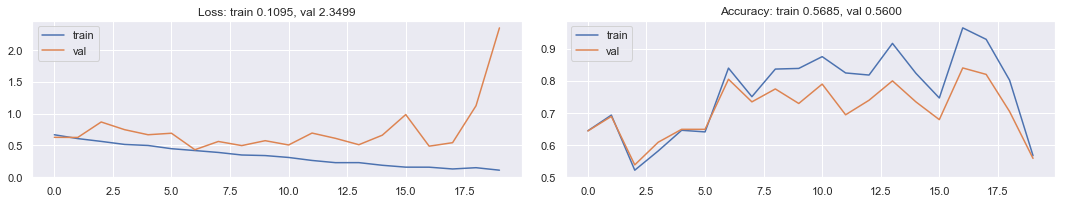

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:18<00:00, 28.23s/it]


Best model results:
Train accuracy: 0.9650
Validation accuracy: 0.8400


In [193]:
### BEGIN Solution

# some parts of the code were taken from seminar 12
import random
from tqdm import trange
from IPython import display

def set_random_seeds(seed_value=0, device='cpu'):
    '''source https://forums.fast.ai/t/solved-reproducibility-where-is-the-randomness-coming-in/31628/5'''
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    random.seed(seed_value)
    if device != 'cpu': 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

train_size = len(train_loader.dataset)
val_size = len(val_loader.dataset)


def get_accuracy(model, dataloader, device='cpu'):
    correct = 0
    with torch.no_grad():
        for x, y in dataloader:
            x = x.to(device)  ## <---
            y = y.to(device)  ## <---
            prediction = model(x).argmax(dim=-1, keepdim=True)
            correct += prediction.eq(y.view_as(prediction)).sum().item()
    return correct / len(dataloader.dataset)


def train(model, optimizer, PATH, epochs_n=100, batch_size=32):
    model.to(device)  ## <---
    
    train_loss_curve = [np.nan] * epochs_n
    val_loss_curve = [np.nan] * epochs_n
    train_accuracy_curve = [np.nan] * epochs_n
    val_accuracy_curve = [np.nan] * epochs_n
    max_val_accuracy = 0
    max_val_accuracy_epoch = 0

    batches_n = (train_size - 1) // batch_size + 1

    for epoch in trange(epochs_n):
        model.train()  ## <---

        train_loss_curve[epoch] = 0
        for x, y in train_loader:
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            prediction = model(x)
            loss = criterion(prediction, y)
            train_loss_curve[epoch] += loss.item()
            loss.backward()
            optimizer.step()

        display.clear_output(wait=True)
        f, axes = plt.subplots(1, 2, figsize=(15, 3))

        train_loss_curve[epoch] /= batches_n
        axes[0].plot(train_loss_curve, label='train')

        model.eval()  ## <---
        
        val_loss_curve[epoch] = 0
        for x, y in val_loader:
            x = x.to(device)
            y = y.to(device)
            prediction = model(x)
            loss = criterion(prediction, y)
            val_loss_curve[epoch] += loss.item()
        
        val_loss_curve[epoch] /= ((val_size - 1) // batch_size + 1)
        axes[0].plot(val_loss_curve, label='val')
        axes[0].set_title('Loss: train {:.4f}, val {:.4f}'.format(train_loss_curve[epoch], val_loss_curve[epoch]))
        axes[0].legend()
        
        train_accuracy_curve[epoch] = get_accuracy(model, train_loader, device)
        val_accuracy_curve[epoch] = get_accuracy(model, val_loader, device)
        
        val_accuracy = val_accuracy_curve[epoch]
        if val_accuracy > max_val_accuracy:
            max_val_accuracy = val_accuracy
            max_val_accuracy_epoch = epoch
            torch.save(model.state_dict(), PATH)
        
        axes[1].set_title('Accuracy: train {:.4f}, val {:.4f}'.format(train_accuracy_curve[epoch], val_accuracy))
        axes[1].plot(train_accuracy_curve, label='train')
        axes[1].plot(val_accuracy_curve, label='val')
        axes[1].legend()

        plt.tight_layout()
        plt.show()

PATH = 'models/rmsprop_001.pt'
set_random_seeds(device=device)
train(model, optimizers[0], PATH=PATH, epochs_n=20)
model.load_state_dict(torch.load(PATH))
model.eval()
print('Best model results:')
print('Train accuracy: {:.4f}'.format(get_accuracy(model, train_loader, device)))
print('Validation accuracy: {:.4f}'.format(get_accuracy(model, val_loader, device)))
### END Solution

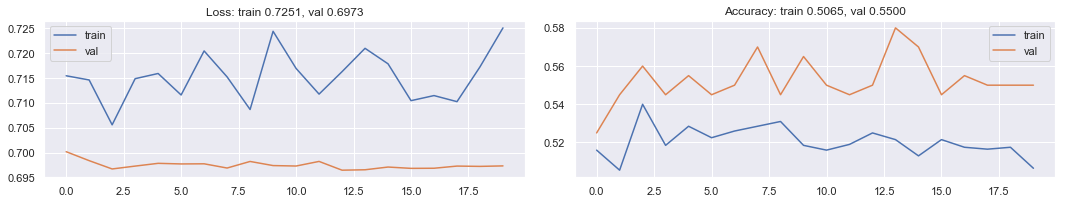

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:14<00:00, 28.15s/it]


Best model results:
Train accuracy: 0.5135
Validation accuracy: 0.5800


In [194]:
PATH = 'models/rmsprop_01.pt'
set_random_seeds(device=device)
model = BlacKitteNet().to(device)
train(model, optimizers[1], PATH=PATH, epochs_n=20)
model.load_state_dict(torch.load(PATH))
model.eval()
print('Best model results:')
print('Train accuracy: {:.4f}'.format(get_accuracy(model, train_loader, device)))
print('Validation accuracy: {:.4f}'.format(get_accuracy(model, val_loader, device)))

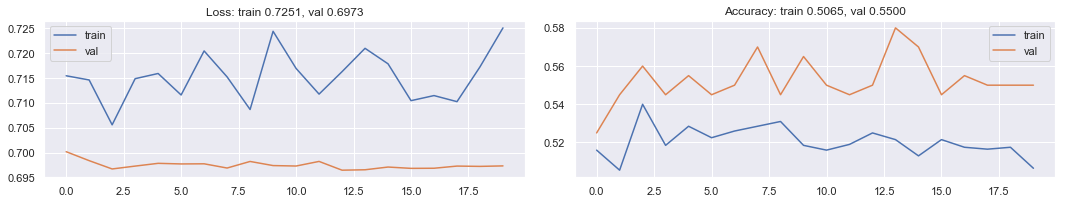

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:26<00:00, 28.21s/it]


Best model results:
Train accuracy: 0.5135
Validation accuracy: 0.5800


In [198]:
PATH = 'models/sgd_001.pt'
set_random_seeds(device=device)
model = BlacKitteNet().to(device)
train(model, optimizers[2], PATH=PATH, epochs_n=20)
model.load_state_dict(torch.load(PATH))
model.eval()
print('Best model results:')
print('Train accuracy: {:.4f}'.format(get_accuracy(model, train_loader, device)))
print('Validation accuracy: {:.4f}'.format(get_accuracy(model, val_loader, device)))

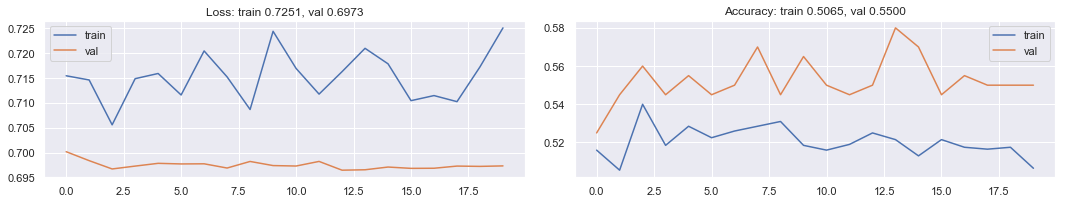

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:16<00:00, 27.61s/it]


Best model results:
Train accuracy: 0.5135
Validation accuracy: 0.5800


In [201]:
PATH = 'models/sgd_005.pt'
set_random_seeds(device=device)
model = BlacKitteNet().to(device)
train(model, optimizers[2], PATH=PATH, epochs_n=20)
model.load_state_dict(torch.load(PATH))
model.eval()
print('Best model results:')
print('Train accuracy: {:.4f}'.format(get_accuracy(model, train_loader, device)))
print('Validation accuracy: {:.4f}'.format(get_accuracy(model, val_loader, device)))

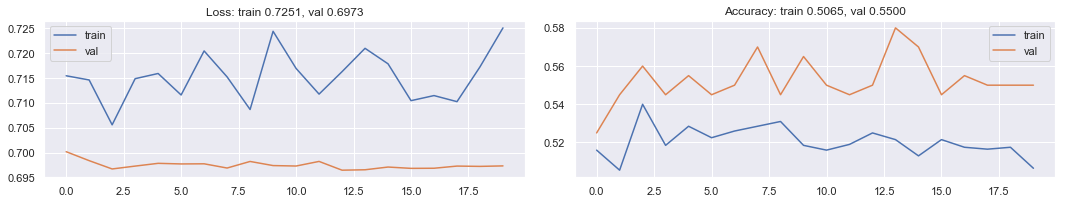

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:22<00:00, 28.03s/it]


Best model results:
Train accuracy: 0.5135
Validation accuracy: 0.5800


In [202]:
PATH = 'models/sgd_005_momentum.pt'
set_random_seeds(device=device)
model = BlacKitteNet().to(device)
train(model, optimizers[3], PATH=PATH, epochs_n=20)
model.load_state_dict(torch.load(PATH))
model.eval()
print('Best model results:')
print('Train accuracy: {:.4f}'.format(get_accuracy(model, train_loader, device)))
print('Validation accuracy: {:.4f}'.format(get_accuracy(model, val_loader, device)))

### Task 9 (1 pt.): Bad activation function
Using your conclusions from the <span style="color:red;">Task 6</span>, choose the worst activation function and replace all activations in your model from the previous <span style="color:red;">Task 8</span> with this one. Demonstrate the training and validation performance of this version of the model.

Now let's have the same network, but with sign activation function. RMSProp with learning rate of 0.001 which proved to be the best in the previous task is used as an optimizer.

In [203]:
class BadBlacKitteNet(nn.Module):
    def __init__(self, inp_ch=1, outp_ch=2):
        super().__init__()
        ### BEGIN Solution
        self.block1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5),
            nn.BatchNorm2d(16)
        )
        
        self.block2 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(16, 64, kernel_size=5),
            nn.BatchNorm2d(64)
        )

        self.block3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(64, 128, kernel_size=5),
            nn.BatchNorm2d(128)
        )
        
        self.block4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3),
            nn.Conv2d(128, 256, kernel_size=5),
            nn.BatchNorm2d(256)
        )
        
        self.final_pool = nn.MaxPool2d(kernel_size=3)
        
        self.classifier_block1 = nn.Sequential(
            nn.Dropout(0.4),
            nn.Linear(256, 32),
            nn.BatchNorm1d(32)
        )
        
        self.classifier_final = nn.Linear(32, outp_ch)
        ### END Solution
       


    def forward(self, input):
        ### BEGIN Solution
        out = torch.sign(self.block1(input))
        out = torch.sign(self.block2(out))
        out = torch.sign(self.block3(out))
        out = torch.sign(self.block4(out))
        out = self.final_pool(out)
        out = out.view(out.size(0), -1)
        out = torch.sign(self.classifier_block1(out))
        out = self.classifier_final(out)
        return F.log_softmax(out, dim=-1)
        ### END Solution
        

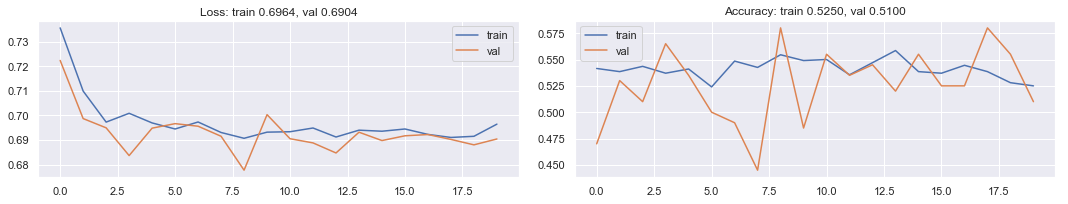

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [09:30<00:00, 28.65s/it]


Best model results:
Train accuracy: 0.5460
Validation accuracy: 0.5800


In [204]:
PATH = 'models/bad_rmsprop_001.pt'
set_random_seeds(device=device)
model = BadBlacKitteNet().to(device)
train(model, torch.optim.RMSprop(model.parameters(), lr=0.001), PATH=PATH, epochs_n=20)
model.load_state_dict(torch.load(PATH))
model.eval()
print('Best model results:')
print('Train accuracy: {:.4f}'.format(get_accuracy(model, train_loader, device)))
print('Validation accuracy: {:.4f}'.format(get_accuracy(model, val_loader, device)))

So, sign is really a poor choice as activation function in this case.